In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
data2020=pd.read_excel('emploi2020.xlsx',engine='openpyxl')
data2014=pd.read_excel('emploi14.xlsx',engine='openpyxl')
data2009=pd.read_excel('emploi09.xlsx',engine='openpyxl')

In [3]:
data2020.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)
data2014.rename(columns={'Tiers lieux par commune.COM': 'COM'}, inplace=True)
data2009.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)

In [4]:
datafin = pd.merge(data2020, data2014, on='COM', how='left')
data = pd.merge(datafin, data2009, on='COM', how='left')

In [5]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)

In [6]:
data=data.drop('N TL',axis=1)
data=data.drop('N TL_x',axis=1)
data=data.drop('N TL_y',axis=1)
#data=data.drop('COM',axis=1)
data=data.drop('EPCI',axis=1)
data.head()

,COM,Caractéristiques de l'emploi 2020.COM,Caractéristiques de l'emploi 2020.REG,Caractéristiques de l'emploi 2020.DEP,Caractéristiques de l'emploi 2020.LIBGEO,P20_ACTOCC15P,P20_SAL15P,P20_NSAL15P,P20_ACTOCC15P_TP,P20_SAL15P_TP,...,P09_FSAL1524_TP,P09_FSAL2554_TP,P09_FSAL5564_TP,P09_ACTOCC15P_ILT1,P09_ACTOCC15P_ILT2P,P09_ACTOCC15P_ILT2,P09_ACTOCC15P_ILT3,P09_ACTOCC15P_ILT4,P09_ACTOCC15P_ILT5,NTLBIN
0,33063,33063.0,75.0,33.0,Bordeaux,117469.130127,96978.839315,20490.290812,20276.800847,16791.396027,...,2805.989298,7368.905829,1166.686514,61896.670068,38988.539683,35834.147711,806.403706,2211.265685,136.722582,1
1,86194,86194.0,75.0,86.0,Poitiers,32763.523571,29601.712621,3161.810950,7569.932846,6950.138483,...,1733.237736,2977.296445,457.868661,23644.856544,10722.626747,8798.931443,892.847800,1011.443780,19.403724,1
2,64102,64102.0,75.0,64.0,Bayonne,22321.072788,19053.491831,3267.580957,3699.427811,3252.413796,...,257.897333,1689.748154,269.363927,9403.663157,8220.722092,6569.113281,1342.766683,268.489765,40.352363,1
3,17300,17300.0,75.0,17.0,La Rochelle,27565.020415,22968.298114,4596.722300,5567.786234,4649.956455,...,516.567125,2446.350086,495.304288,18744.562794,7826.169473,6604.687579,443.665340,736.473899,41.342656,1
4,87085,87085.0,75.0,87.0,Limoges,47583.622124,42548.642042,5034.980083,8604.093554,7895.990386,...,1559.345775,4035.049742,865.576619,45443.314113,10153.145487,7810.012647,1018.980260,1275.747424,48.405156,1


In [7]:
columns_to_drop = data.filter(regex="^Caractéristiques de l'emploi|^Demandeurs d'Emploi 2022|^Emploi-Population active").columns
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,COM,P20_ACTOCC15P,P20_SAL15P,P20_NSAL15P,P20_ACTOCC15P_TP,P20_SAL15P_TP,P20_HSAL15P_TP,P20_FSAL15P_TP,P20_NSAL15P_TP,P20_HACTOCC15P,...,P09_FSAL1524_TP,P09_FSAL2554_TP,P09_FSAL5564_TP,P09_ACTOCC15P_ILT1,P09_ACTOCC15P_ILT2P,P09_ACTOCC15P_ILT2,P09_ACTOCC15P_ILT3,P09_ACTOCC15P_ILT4,P09_ACTOCC15P_ILT5,NTLBIN
0,33063,117469.130127,96978.839315,20490.290812,20276.800847,16791.396027,5594.372892,11197.023135,3485.404821,58635.876979,...,2805.989298,7368.905829,1166.686514,61896.670068,38988.539683,35834.147711,806.403706,2211.265685,136.722582,1
1,86194,32763.523571,29601.712621,3161.810950,7569.932846,6950.138483,2315.342149,4634.796335,619.794363,16291.532634,...,1733.237736,2977.296445,457.868661,23644.856544,10722.626747,8798.931443,892.847800,1011.443780,19.403724,1
2,64102,22321.072788,19053.491831,3267.580957,3699.427811,3252.413796,851.276679,2401.137117,447.014015,11287.274290,...,257.897333,1689.748154,269.363927,9403.663157,8220.722092,6569.113281,1342.766683,268.489765,40.352363,1
3,17300,27565.020415,22968.298114,4596.722300,5567.786234,4649.956455,1451.959836,3197.996619,917.829779,13846.685563,...,516.567125,2446.350086,495.304288,18744.562794,7826.169473,6604.687579,443.665340,736.473899,41.342656,1
4,87085,47583.622124,42548.642042,5034.980083,8604.093554,7895.990386,2494.525628,5401.464758,708.103168,23813.568633,...,1559.345775,4035.049742,865.576619,45443.314113,10153.145487,7810.012647,1018.980260,1275.747424,48.405156,1


In [8]:
total_rows = data.shape[0]
def replace_with_median_if_less_than_half(column):
    num_nan_inf = column.isna().sum() + np.isinf(column).sum()
    if num_nan_inf < (total_rows / 2):
        median = column[~column.isin([np.nan, np.inf, -np.inf])].median()
        return column.replace([np.nan, np.inf, -np.inf], median)
    else:
        return column

# Appliquer la fonction à chaque colonne
data = data.apply(replace_with_median_if_less_than_half)

# Afficher les données traitées
print(data)

        COM  P20_ACTOCC15P    P20_SAL15P   P20_NSAL15P  P20_ACTOCC15P_TP  \
0     33063  117469.130127  96978.839315  20490.290812      20276.800847   
1     86194   32763.523571  29601.712621   3161.810950       7569.932846   
2     64102   22321.072788  19053.491831   3267.580957       3699.427811   
3     17300   27565.020415  22968.298114   4596.722300       5567.786234   
4     87085   47583.622124  42548.642042   5034.980083       8604.093554   
...     ...            ...           ...           ...               ...   
4304  47120      41.735294     32.029412      9.705882         11.647059   
4305  47121     117.031316     91.758156     25.273161         17.482633   
4306  47122      80.946746     62.840237     18.106509         11.715976   
4307  47073      87.336788     56.870466     30.466321         13.202073   
4308  47114     163.473479    133.260629     30.212850         28.941038   

      P20_SAL15P_TP  P20_HSAL15P_TP  P20_FSAL15P_TP  P20_NSAL15P_TP  \
0      16791.396

In [9]:
data = data.apply(lambda x: x.fillna(x.median()), axis=0)

In [12]:
'''
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10

# Boucle pour supprimer les variables avec un VIF élevé
while vif_data['VIF'].max() > high_vif_threshold and X.shape[1] > 250:
    # Trouver les 10 variables avec les VIF les plus élevés
    max_vif_variables = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[:50].tolist()
    print(f'Suppression des variables avec les VIF les plus élevés: {max_vif_variables}')
    
    # Supprimer ces variables de X
    X = X.drop(columns=max_vif_variables)
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)
'''   
while vif_data['VIF'].max() > high_vif_threshold and X.shape[1]>100:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[:10].tolist()
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=max_vif_variable)
    vif_data = calculate_vif(X)
    print(vif_data)

# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


Suppression de la variable avec le VIF le plus élevé: ['P20_HACTOCC1524', 'P20_FACTOCC1564', 'P20_HACTOCC2554', 'C09_CONSTLT_F', 'P20_HACTOCC1564', 'P20_ACTOCC5564', 'P20_ACTOCC2554', 'P20_ACTOCC1524', 'P20_ACTOCC1564', 'P20_FACT5564']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  1.807436e+04
1         P20_FSAL15P_TP  7.351786e+04
2         P20_NSAL15P_TP  6.613774e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
209         P09_FSAL1524  9.975974e+02
210  P09_ACTOCC15P_ILT2P  4.733719e+05
211   P09_ACTOCC15P_ILT2  4.013747e+05
212   P09_ACTOCC15P_ILT3  2.377194e+03
213   P09_ACTOCC15P_ILT4  1.986514e+03

[214 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P20_FACT1564', 'P20_FACT1524', 'P20_HACT5564', 'P20_HACT2554', 'P20_HACT1524', 'P20_HACT1564', 'P20_ACT5564', 'P20_ACT2554', 'P20_ACT1524', 'P20_ACT1564']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  1.801465e+04
1         P20_FSAL15P_TP  7.302203e+04
2         P20_NSAL15P_TP  6.607488e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
199         P09_FSAL1524  9.783148e+02
200  P09_ACTOCC15P_ILT2P  4.683924e+05
201   P09_ACTOCC15P_ILT2  3.971368e+05
202   P09_ACTOCC15P_ILT3  2.352699e+03
203   P09_ACTOCC15P_ILT4  1.968192e+03

[204 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P20_ACTOCC15P_2ROUESMOT', 'P20_POP5564', 'P20_F5564', 'P20_F2554', 'P20_F1524', 'P20_F1564', 'P20_H5564', 'P20_H2554', 'P20_H1524', 'P20_H1564']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  1.789730e+04
1         P20_FSAL15P_TP  7.274943e+04
2         P20_NSAL15P_TP  6.577919e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
189         P09_FSAL1524  9.714093e+02
190  P09_ACTOCC15P_ILT2P  4.499606e+05
191   P09_ACTOCC15P_ILT2  3.805195e+05
192   P09_ACTOCC15P_ILT3  2.263215e+03
193   P09_ACTOCC15P_ILT4  1.893065e+03

[194 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P20_FSAL1564_TP', 'P09_HSAL15P_INTERIM', 'P20_FSAL5564', 'P09_HSAL15P_CDI', 'P20_FSAL1524_TP', 'P20_FSAL2554_TP', 'P20_FSAL5564_TP', 'P20_ACTOCC15P_ILT1', 'P20_ACTOCC15P_ILT2P', 'P20_ACTOCC15P_ILT2']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  1.755981e+04
1         P20_FSAL15P_TP  1.372263e+03
2         P20_NSAL15P_TP  6.502268e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
179         P09_FSAL1524  9.622790e+02
180  P09_ACTOCC15P_ILT2P  4.453841e+05
181   P09_ACTOCC15P_ILT2  3.769633e+05
182   P09_ACTOCC15P_ILT3  2.242163e+03
183   P09_ACTOCC15P_ILT4  1.875419e+03

[184 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P09_ACTOCC15P_TP', 'P20_FNSAL15P_AIDFAM', 'P20_HSAL1524', 'P20_HSAL2554', 'P20_HSAL5564', 'P20_HSAL1564_TP', 'P20_HSAL1524_TP', 'P20_HSAL2554_TP', 'P20_HSAL5564_TP', 'P09_SAL15P']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  8.248326e+02
1         P20_FSAL15P_TP  1.354742e+03
2         P20_NSAL15P_TP  6.323464e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
169         P09_FSAL1524  9.539923e+02
170  P09_ACTOCC15P_ILT2P  4.401275e+05
171   P09_ACTOCC15P_ILT2  3.726749e+05
172   P09_ACTOCC15P_ILT3  2.218032e+03
173   P09_ACTOCC15P_ILT4  1.851427e+03

[174 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P09_FSAL15P_TP', 'P09_ACTOCC15P', 'P20_FSAL15P_APPR', 'P20_FNSAL15P', 'P09_HSAL15P_TP', 'P09_SAL15P_TP', 'P09_NSAL15P', 'C09_CTSLT_F', 'P09_HNSAL15P_INDEP', 'P09_HNSAL15P_AIDFAM']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  7.767813e+02
1         P20_FSAL15P_TP  1.285863e+03
2         P20_NSAL15P_TP  6.308242e+02
3         P20_HACTOCC15P           inf
4            P20_HSAL15P           inf
..                   ...           ...
159         P09_FSAL1524  9.498033e+02
160  P09_ACTOCC15P_ILT2P  4.371363e+05
161   P09_ACTOCC15P_ILT2  3.696909e+05
162   P09_ACTOCC15P_ILT3  2.205010e+03
163   P09_ACTOCC15P_ILT4  1.837469e+03

[164 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P20_HNSAL15P_EMPLOY', 'P20_HACTOCC15P', 'P20_HSAL15P', 'P20_HSAL15P_CDI', 'P20_HSAL15P_CDD', 'P20_HSAL15P_INTERIM', 'P20_HSAL15P_EMPAID', 'P20_HSAL15P_APPR', 'P20_HNSAL15P', 'P20_HNSAL15P_INDEP']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP  7.254086e+02
1         P20_FSAL15P_TP  1.273167e+03
2         P20_NSAL15P_TP  6.117114e+02
3    P20_HNSAL15P_AIDFAM  7.234549e+00
4         P20_FACTOCC15P  2.380529e+06
..                   ...           ...
149         P09_FSAL1524  9.351291e+02
150  P09_ACTOCC15P_ILT2P  4.292113e+05
151   P09_ACTOCC15P_ILT2  3.633701e+05
152   P09_ACTOCC15P_ILT3  2.163288e+03
153   P09_ACTOCC15P_ILT4  1.802324e+03

[154 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P14_ACTOCC', 'P14_SAL15P', 'P09_ACTOCC', 'P20_ACT15P', 'P20_ACTOCC', 'P09_HACTOCC15P', 'P09_FACTOCC15P', 'P20_FSAL15P', 'P20_FACTOCC15P', 'P20_POP1564']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable            VIF
0         P20_HSAL15P_TP     689.828468
1         P20_FSAL15P_TP    1226.711354
2         P20_NSAL15P_TP     568.379178
3    P20_HNSAL15P_AIDFAM       7.044134
4        P20_FSAL15P_CDI   90528.353843
..                   ...            ...
139         P09_FSAL1524     890.083566
140  P09_ACTOCC15P_ILT2P  415079.500186
141   P09_ACTOCC15P_ILT2  351267.274756
142   P09_ACTOCC15P_ILT3    2096.425990
143   P09_ACTOCC15P_ILT4    1744.315449

[144 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['C09_ACT1564', 'C14_ACT1564', 'P09_ACTOCC15P_ILT2P', 'C20_ACT1564', 'P09_ACTOCC15P_ILT2', 'ABC_FR', 'P20_FACTOCC2554', 'P20_FSAL1564', 'ABCDE', 'C20_ACTOCC1564']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP    675.721098
1         P20_FSAL15P_TP   1201.874208
2         P20_NSAL15P_TP    543.186735
3    P20_HNSAL15P_AIDFAM      6.832555
4        P20_FSAL15P_CDI  30056.525514
..                   ...           ...
129  P09_HNSAL15P_EMPLOY    434.124635
130          P09_FSAL15P  16943.923893
131         P09_FSAL1524    863.948703
132   P09_ACTOCC15P_ILT3     45.798353
133   P09_ACTOCC15P_ILT4     43.302070

[134 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P14_POP1564', 'P09_ACT15P', 'P14_POP15P', 'P20_FACT2554', 'P14_ACT15P', 'C20_ACT1564_CS3', 'C20_ACTOCC1564_CS3', 'C09_EMPLT_SAL', 'P20_FSAL2554', 'P20_POP2554']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable           VIF
0         P20_HSAL15P_TP    637.324578
1         P20_FSAL15P_TP   1123.706431
2         P20_NSAL15P_TP    532.047066
3    P20_HNSAL15P_AIDFAM      6.667708
4        P20_FSAL15P_CDI  16664.094261
..                   ...           ...
119  P09_HNSAL15P_EMPLOY    422.247771
120          P09_FSAL15P   8748.445903
121         P09_FSAL1524    784.626184
122   P09_ACTOCC15P_ILT3     44.779623
123   P09_ACTOCC15P_ILT4     42.244900

[124 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P14_ACTOCC15P_TP', 'P14_SAL15P_TP', 'P20_FSAL1524', 'P20_ACTOCC15P_VOITURE', 'P20_FACTOCC1524', 'ABCDE_F', 'P09_EMPLT_FSAL', 'P20_FSAL15P_CDI', 'C20_ACT1564_CS4', 'C20_EMPLT_SAL']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable          VIF
0         P20_HSAL15P_TP   597.408081
1         P20_FSAL15P_TP   818.552852
2         P20_NSAL15P_TP   471.423874
3    P20_HNSAL15P_AIDFAM     6.491526
4        P20_FSAL15P_CDD   578.433522
..                   ...          ...
109  P09_HNSAL15P_EMPLOY   417.503085
110          P09_FSAL15P  8107.970973
111         P09_FSAL1524   711.240712
112   P09_ACTOCC15P_ILT3    43.521132
113   P09_ACTOCC15P_ILT4    41.349577

[114 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['P20_EMPLT_FSAL', 'P20_POP15P', 'P14_EMPLT_FSAL', 'ABC_CAPBEP', 'P09_FSAL15P', 'C20_ACT1564_CS5', 'P09_POP15P', 'ABC_CAPBEP_F', 'C20_ACTOCC1564_CS5', 'ABC_Ins5']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                Variable          VIF
0         P20_HSAL15P_TP   563.585068
1         P20_FSAL15P_TP   774.074834
2         P20_NSAL15P_TP   449.115411
3    P20_HNSAL15P_AIDFAM     6.399361
4        P20_FSAL15P_CDD   517.869383
..                   ...          ...
99          P09_HNSAL15P  1156.504744
100  P09_HNSAL15P_EMPLOY   410.049347
101         P09_FSAL1524   616.544245
102   P09_ACTOCC15P_ILT3    41.484216
103   P09_ACTOCC15P_ILT4    39.145161

[104 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ['C09_INDUSLT_F', 'C09_INDUSLT_FSAL', 'P14_POP1524', 'C20_ACT1564_CS2', 'C20_EMPLT_CTS', 'P14_FSAL2554', 'C20_ACTOCC1564_CS2', 'C09_CTSLT_SAL', 'C09_CTSLT_FSAL', 'P20_EMPLT_SALTP']


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0        P20_HSAL15P_TP   516.610392
1        P20_FSAL15P_TP   669.284743
2        P20_NSAL15P_TP   431.163542
3   P20_HNSAL15P_AIDFAM     6.033095
4       P20_FSAL15P_CDD   500.476351
..                  ...          ...
89         P09_HNSAL15P  1098.839337
90  P09_HNSAL15P_EMPLOY   397.463573
91         P09_FSAL1524   608.476459
92   P09_ACTOCC15P_ILT3    40.989120
93   P09_ACTOCC15P_ILT4    38.699124

[94 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_HSAL1564


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0        P20_HSAL15P_TP   516.540561
1        P20_FSAL15P_TP   648.970517
2        P20_NSAL15P_TP   431.025796
3   P20_HNSAL15P_AIDFAM     5.991167
4       P20_FSAL15P_CDD   495.101277
..                  ...          ...
88         P09_HNSAL15P  1090.023768
89  P09_HNSAL15P_EMPLOY   397.444148
90         P09_FSAL1524   599.934240
91   P09_ACTOCC15P_ILT3    40.423923
92   P09_ACTOCC15P_ILT4    38.253721

[93 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_ACTOCC15P_COMMUN


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0        P20_HSAL15P_TP   506.109092
1        P20_FSAL15P_TP   646.758735
2        P20_NSAL15P_TP   428.014476
3   P20_HNSAL15P_AIDFAM     5.986919
4       P20_FSAL15P_CDD   485.786322
..                  ...          ...
87         P09_HNSAL15P  1090.003115
88  P09_HNSAL15P_EMPLOY   397.206116
89         P09_FSAL1524   598.482935
90   P09_ACTOCC15P_ILT3    40.007123
91   P09_ACTOCC15P_ILT4    37.936358

[92 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C20_APESASLT_FSAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0        P20_HSAL15P_TP   505.858713
1        P20_FSAL15P_TP   646.641617
2        P20_NSAL15P_TP   422.923217
3   P20_HNSAL15P_AIDFAM     5.965179
4       P20_FSAL15P_CDD   473.854082
..                  ...          ...
86         P09_HNSAL15P  1089.526330
87  P09_HNSAL15P_EMPLOY   395.713271
88         P09_FSAL1524   591.324745
89   P09_ACTOCC15P_ILT3    39.998165
90   P09_ACTOCC15P_ILT4    37.922437

[91 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_EMPLT_SALTP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable          VIF
0        P20_HSAL15P_TP   504.638440
1        P20_FSAL15P_TP   633.142888
2        P20_NSAL15P_TP   422.802571
3   P20_HNSAL15P_AIDFAM     5.962616
4       P20_FSAL15P_CDD   464.523553
..                  ...          ...
85         P09_HNSAL15P  1087.328245
86  P09_HNSAL15P_EMPLOY   395.672391
87         P09_FSAL1524   587.610526
88   P09_ACTOCC15P_ILT3    39.795513
89   P09_ACTOCC15P_ILT4    37.757965

[90 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_NSAL15P


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  504.634074
1        P20_FSAL15P_TP  630.783192
2        P20_NSAL15P_TP  422.311467
3   P20_HNSAL15P_AIDFAM    5.962613
4       P20_FSAL15P_CDD  464.167644
..                  ...         ...
84         P09_HNSAL15P  911.544282
85  P09_HNSAL15P_EMPLOY  395.633772
86         P09_FSAL1524  578.480839
87   P09_ACTOCC15P_ILT3   39.739904
88   P09_ACTOCC15P_ILT4   37.716116

[89 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C20_EMPLT_CS5


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  504.047749
1        P20_FSAL15P_TP  630.758905
2        P20_NSAL15P_TP  422.283637
3   P20_HNSAL15P_AIDFAM    5.943351
4       P20_FSAL15P_CDD  463.798220
..                  ...         ...
83         P09_HNSAL15P  908.339150
84  P09_HNSAL15P_EMPLOY  395.512167
85         P09_FSAL1524  577.293832
86   P09_ACTOCC15P_ILT3   39.739634
87   P09_ACTOCC15P_ILT4   37.704192

[88 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_EMPLT_FNSAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  499.502529
1        P20_FSAL15P_TP  627.844572
2        P20_NSAL15P_TP  389.382819
3   P20_HNSAL15P_AIDFAM    5.930757
4       P20_FSAL15P_CDD  460.349406
..                  ...         ...
82         P09_HNSAL15P  902.709526
83  P09_HNSAL15P_EMPLOY  394.602914
84         P09_FSAL1524  570.276217
85   P09_ACTOCC15P_ILT3   39.525719
86   P09_ACTOCC15P_ILT4   37.703746

[87 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_INACT1564


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  495.482378
1        P20_FSAL15P_TP  627.685722
2        P20_NSAL15P_TP  389.273296
3   P20_HNSAL15P_AIDFAM    5.930116
4       P20_FSAL15P_CDD  460.124495
..                  ...         ...
81         P09_HNSAL15P  896.873490
82  P09_HNSAL15P_EMPLOY  394.441314
83         P09_FSAL1524  569.436142
84   P09_ACTOCC15P_ILT3   39.302862
85   P09_ACTOCC15P_ILT4   37.619154

[86 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_ACTOCC15P_2ROUES


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  493.833754
1        P20_FSAL15P_TP  624.710421
2        P20_NSAL15P_TP  388.927499
3   P20_HNSAL15P_AIDFAM    5.920881
4       P20_FSAL15P_CDD  454.943108
..                  ...         ...
80         P09_HNSAL15P  895.337564
81  P09_HNSAL15P_EMPLOY  392.053308
82         P09_FSAL1524  566.338671
83   P09_ACTOCC15P_ILT3   38.813287
84   P09_ACTOCC15P_ILT4   37.547543

[85 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P09_HNSAL15P


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  492.667001
1        P20_FSAL15P_TP  624.615835
2        P20_NSAL15P_TP  388.919645
3   P20_HNSAL15P_AIDFAM    5.849579
4       P20_FSAL15P_CDD  453.192849
..                  ...         ...
79     P09_HSAL15P_APPR   77.709882
80  P09_HNSAL15P_EMPLOY  206.021862
81         P09_FSAL1524  565.905222
82   P09_ACTOCC15P_ILT3   38.791542
83   P09_ACTOCC15P_ILT4   37.472981

[84 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C14_ACT1564_CS4


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  492.106097
1        P20_FSAL15P_TP  619.432833
2        P20_NSAL15P_TP  386.694499
3   P20_HNSAL15P_AIDFAM    5.845909
4       P20_FSAL15P_CDD  452.877160
..                  ...         ...
78     P09_HSAL15P_APPR   77.504713
79  P09_HNSAL15P_EMPLOY  205.715900
80         P09_FSAL1524  557.544518
81   P09_ACTOCC15P_ILT3   38.706670
82   P09_ACTOCC15P_ILT4   37.327928

[83 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C14_ACT1564_CS3


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  491.284963
1        P20_FSAL15P_TP  606.471232
2        P20_NSAL15P_TP  385.391148
3   P20_HNSAL15P_AIDFAM    5.829329
4       P20_FSAL15P_CDD  449.675422
..                  ...         ...
77     P09_HSAL15P_APPR   77.347914
78  P09_HNSAL15P_EMPLOY  205.715900
79         P09_FSAL1524  557.020577
80   P09_ACTOCC15P_ILT3   38.541450
81   P09_ACTOCC15P_ILT4   37.229805

[82 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_EMPLT_FNSAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  491.073120
1        P20_FSAL15P_TP  606.017738
2        P20_NSAL15P_TP  373.966308
3   P20_HNSAL15P_AIDFAM    5.822535
4       P20_FSAL15P_CDD  449.221701
..                  ...         ...
76     P09_HSAL15P_APPR   76.692078
77  P09_HNSAL15P_EMPLOY  202.210928
78         P09_FSAL1524  551.076132
79   P09_ACTOCC15P_ILT3   38.468142
80   P09_ACTOCC15P_ILT4   37.154536

[81 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_ACTOCC15P_MARCHE


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  488.208877
1        P20_FSAL15P_TP  601.672217
2        P20_NSAL15P_TP  373.961474
3   P20_HNSAL15P_AIDFAM    5.728564
4       P20_FSAL15P_CDD  449.216723
..                  ...         ...
75     P09_HSAL15P_APPR   76.144078
76  P09_HNSAL15P_EMPLOY  201.772181
77         P09_FSAL1524  548.584846
78   P09_ACTOCC15P_ILT3   38.427926
79   P09_ACTOCC15P_ILT4   37.096427

[80 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C09_ACT1564_CS5


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  482.464801
1        P20_FSAL15P_TP  599.203585
2        P20_NSAL15P_TP  372.617748
3   P20_HNSAL15P_AIDFAM    5.684077
4       P20_FSAL15P_CDD  446.159692
..                  ...         ...
74     P09_HSAL15P_APPR   76.114611
75  P09_HNSAL15P_EMPLOY  201.772161
76         P09_FSAL1524  515.130578
77   P09_ACTOCC15P_ILT3   37.977841
78   P09_ACTOCC15P_ILT4   36.957428

[79 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C09_ACT1564_CS4


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  481.270965
1        P20_FSAL15P_TP  578.666057
2        P20_NSAL15P_TP  372.608854
3   P20_HNSAL15P_AIDFAM    5.650455
4       P20_FSAL15P_CDD  442.020940
..                  ...         ...
73     P09_HSAL15P_APPR   76.114573
74  P09_HNSAL15P_EMPLOY  201.435523
75         P09_FSAL1524  495.004667
76   P09_ACTOCC15P_ILT3   37.604385
77   P09_ACTOCC15P_ILT4   36.768106

[78 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P14_FSAL1524


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  478.834982
1        P20_FSAL15P_TP  574.458417
2        P20_NSAL15P_TP  372.556741
3   P20_HNSAL15P_AIDFAM    5.648910
4       P20_FSAL15P_CDD  430.745639
..                  ...         ...
72     P09_HSAL15P_APPR   75.862477
73  P09_HNSAL15P_EMPLOY  200.493913
74         P09_FSAL1524  341.487220
75   P09_ACTOCC15P_ILT3   37.382594
76   P09_ACTOCC15P_ILT4   36.647714

[77 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C09_CTSLT_NSAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  478.828600
1        P20_FSAL15P_TP  570.426171
2        P20_NSAL15P_TP  366.014806
3   P20_HNSAL15P_AIDFAM    5.647181
4       P20_FSAL15P_CDD  429.937059
..                  ...         ...
71     P09_HSAL15P_APPR   75.804972
72  P09_HNSAL15P_EMPLOY  196.571571
73         P09_FSAL1524  337.552830
74   P09_ACTOCC15P_ILT3   37.361966
75   P09_ACTOCC15P_ILT4   36.622034

[76 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_FSAL15P_TP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  458.887223
1        P20_NSAL15P_TP  365.678373
2   P20_HNSAL15P_AIDFAM    5.594239
3       P20_FSAL15P_CDD  380.530563
4   P20_FSAL15P_INTERIM   32.600948
..                  ...         ...
70     P09_HSAL15P_APPR   75.804899
71  P09_HNSAL15P_EMPLOY  196.184753
72         P09_FSAL1524  337.521531
73   P09_ACTOCC15P_ILT3   36.631931
74   P09_ACTOCC15P_ILT4   35.988015

[75 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C09_APESASLT_F


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  448.805768
1        P20_NSAL15P_TP  363.239625
2   P20_HNSAL15P_AIDFAM    5.593887
3       P20_FSAL15P_CDD  372.323040
4   P20_FSAL15P_INTERIM   32.493688
..                  ...         ...
69     P09_HSAL15P_APPR   74.551025
70  P09_HNSAL15P_EMPLOY  194.340338
71         P09_FSAL1524  337.422662
72   P09_ACTOCC15P_ILT3   36.565116
73   P09_ACTOCC15P_ILT4   35.947172

[74 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C14_ACT1564_CS5


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  448.371505
1        P20_NSAL15P_TP  360.976744
2   P20_HNSAL15P_AIDFAM    5.593155
3       P20_FSAL15P_CDD  370.937083
4   P20_FSAL15P_INTERIM   32.447984
..                  ...         ...
68     P09_HSAL15P_APPR   74.511590
69  P09_HNSAL15P_EMPLOY  192.349975
70         P09_FSAL1524  310.464838
71   P09_ACTOCC15P_ILT3   36.564315
72   P09_ACTOCC15P_ILT4   35.930596

[73 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P09_EMPLT_FNSAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_HSAL15P_TP  447.638364
1        P20_NSAL15P_TP  355.789176
2   P20_HNSAL15P_AIDFAM    5.557031
3       P20_FSAL15P_CDD  370.096861
4   P20_FSAL15P_INTERIM   32.373548
..                  ...         ...
67     P09_HSAL15P_APPR   74.104753
68  P09_HNSAL15P_EMPLOY  191.285241
69         P09_FSAL1524  309.317462
70   P09_ACTOCC15P_ILT3   36.534466
71   P09_ACTOCC15P_ILT4   35.921831

[72 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_HSAL15P_TP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  354.338521
1   P20_HNSAL15P_AIDFAM    5.546605
2       P20_FSAL15P_CDD  367.073968
3   P20_FSAL15P_INTERIM   32.371118
4    P20_FSAL15P_EMPAID   23.249064
..                  ...         ...
66     P09_HSAL15P_APPR   73.477617
67  P09_HNSAL15P_EMPLOY  189.098491
68         P09_FSAL1524  309.047416
69   P09_ACTOCC15P_ILT3   36.530947
70   P09_ACTOCC15P_ILT4   35.900695

[71 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_EMPLT_NSALTP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  264.396601
1   P20_HNSAL15P_AIDFAM    5.497575
2       P20_FSAL15P_CDD  366.998406
3   P20_FSAL15P_INTERIM   32.343038
4    P20_FSAL15P_EMPAID   23.071424
..                  ...         ...
65     P09_HSAL15P_APPR   73.454812
66  P09_HNSAL15P_EMPLOY  187.040317
67         P09_FSAL1524  305.218265
68   P09_ACTOCC15P_ILT3   36.526678
69   P09_ACTOCC15P_ILT4   35.885148

[70 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_CHOMEUR1564


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  260.792410
1   P20_HNSAL15P_AIDFAM    5.497506
2       P20_FSAL15P_CDD  366.066377
3   P20_FSAL15P_INTERIM   31.955071
4    P20_FSAL15P_EMPAID   21.633618
..                  ...         ...
64     P09_HSAL15P_APPR   73.038061
65  P09_HNSAL15P_EMPLOY  186.467596
66         P09_FSAL1524  304.557468
67   P09_ACTOCC15P_ILT3   36.260404
68   P09_ACTOCC15P_ILT4   35.322294

[69 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C20_ACT1564_CS1


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  260.219818
1   P20_HNSAL15P_AIDFAM    5.487276
2       P20_FSAL15P_CDD  365.806611
3   P20_FSAL15P_INTERIM   31.935102
4    P20_FSAL15P_EMPAID   21.629101
..                  ...         ...
63     P09_HSAL15P_APPR   73.036705
64  P09_HNSAL15P_EMPLOY  186.382697
65         P09_FSAL1524  303.939728
66   P09_ACTOCC15P_ILT3   36.260166
67   P09_ACTOCC15P_ILT4   35.319533

[68 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_FSAL15P_CDD


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  259.745717
1   P20_HNSAL15P_AIDFAM    5.468334
2   P20_FSAL15P_INTERIM   31.444723
3    P20_FSAL15P_EMPAID   21.352395
4    P20_FNSAL15P_INDEP  288.836878
..                  ...         ...
62     P09_HSAL15P_APPR   72.997646
63  P09_HNSAL15P_EMPLOY  186.299978
64         P09_FSAL1524  299.634954
65   P09_ACTOCC15P_ILT3   35.996542
66   P09_ACTOCC15P_ILT4   35.044917

[67 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ABC_Ins1


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  252.178700
1   P20_HNSAL15P_AIDFAM    5.452086
2   P20_FSAL15P_INTERIM   31.440190
3    P20_FSAL15P_EMPAID   21.351623
4    P20_FNSAL15P_INDEP  275.237929
..                  ...         ...
61     P09_HSAL15P_APPR   72.589762
62  P09_HNSAL15P_EMPLOY  182.726054
63         P09_FSAL1524  292.949784
64   P09_ACTOCC15P_ILT3   35.940861
65   P09_ACTOCC15P_ILT4   34.983594

[66 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P09_EMPLT_SALTP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  252.063912
1   P20_HNSAL15P_AIDFAM    5.451424
2   P20_FSAL15P_INTERIM   31.440186
3    P20_FSAL15P_EMPAID   21.310351
4    P20_FNSAL15P_INDEP  274.263764
..                  ...         ...
60     P09_HSAL15P_APPR   72.152074
61  P09_HNSAL15P_EMPLOY  179.485897
62         P09_FSAL1524  272.517646
63   P09_ACTOCC15P_ILT3   35.912652
64   P09_ACTOCC15P_ILT4   34.913298

[65 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: ABC_Ins2


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  251.859179
1   P20_HNSAL15P_AIDFAM    5.382261
2   P20_FSAL15P_INTERIM   31.151823
3    P20_FSAL15P_EMPAID   21.282047
4    P20_FNSAL15P_INDEP  274.216258
..                  ...         ...
59     P09_HSAL15P_APPR   72.130504
60  P09_HNSAL15P_EMPLOY  179.485892
61         P09_FSAL1524  270.801400
62   P09_ACTOCC15P_ILT3   35.295082
63   P09_ACTOCC15P_ILT4   33.541998

[64 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: C14_ACT1564_CS6


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  251.826152
1   P20_HNSAL15P_AIDFAM    5.381493
2   P20_FSAL15P_INTERIM   30.603425
3    P20_FSAL15P_EMPAID   21.279924
4    P20_FNSAL15P_INDEP  274.202795
..                  ...         ...
58     P09_HSAL15P_APPR   72.130261
59  P09_HNSAL15P_EMPLOY  178.789876
60         P09_FSAL1524  270.617500
61   P09_ACTOCC15P_ILT3   35.199596
62   P09_ACTOCC15P_ILT4   33.538050

[63 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_FNSAL15P_INDEP


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  184.776758
1   P20_HNSAL15P_AIDFAM    5.361241
2   P20_FSAL15P_INTERIM   30.526923
3    P20_FSAL15P_EMPAID   20.506077
4   P20_FNSAL15P_EMPLOY   99.948282
..                  ...         ...
57     P09_HSAL15P_APPR   71.845934
58  P09_HNSAL15P_EMPLOY  177.385038
59         P09_FSAL1524  270.294483
60   P09_ACTOCC15P_ILT3   35.199524
61   P09_ACTOCC15P_ILT4   33.516200

[62 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P09_FSAL1524


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable         VIF
0        P20_NSAL15P_TP  182.366016
1   P20_HNSAL15P_AIDFAM    5.360812
2   P20_FSAL15P_INTERIM   30.488152
3    P20_FSAL15P_EMPAID   20.505640
4   P20_FNSAL15P_EMPLOY   99.769954
..                  ...         ...
56   P09_HSAL15P_EMPAID   15.169707
57     P09_HSAL15P_APPR   67.651006
58  P09_HNSAL15P_EMPLOY  175.925244
59   P09_ACTOCC15P_ILT3   33.774663
60   P09_ACTOCC15P_ILT4   32.744834

[61 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: P20_HACTOCC5564


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  179.472867
1      P20_HNSAL15P_AIDFAM    5.360807
2      P20_FSAL15P_INTERIM   30.388724
3       P20_FSAL15P_EMPAID   20.495761
4      P20_FNSAL15P_EMPLOY   99.731627
5       P20_ACTOCC15P_ILT3   40.470314
6       P20_ACTOCC15P_ILT4   35.415661
7       P20_ACTOCC15P_ILT5    1.634728
8   P20_ACTOCC15P_PASTRANS   44.136412
9       P20_ACTOCC15P_VELO   85.307696
10    P20_ACTOCC15P_COMMUN  174.041174
11             P20_POP1524  128.216698
12         C20_ACT1564_CS6  200.933852
13      C20_ACTOCC1564_CS1    4.487688
14      C20_ACTOCC1564_CS4  217.951312
15        C20_EMPLT_APESAS  129.295359
16         C20_AGRILT_FSAL    6.241394
17        C20_INDUSLT_FSAL   18.995003
18        C20_CONSTLT_FSAL   18.878729
19          C20_CTSLT_FSAL   83.913174
20                      UU   30.265730
21                    NOTE         NaN
22                   ABC_E  143.692481
23                ABC_Ins3  172.122426
24                ABC_Ins

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  179.461026
1      P20_HNSAL15P_AIDFAM    5.355516
2      P20_FSAL15P_INTERIM   30.212132
3       P20_FSAL15P_EMPAID   20.404364
4      P20_FNSAL15P_EMPLOY   99.731053
5       P20_ACTOCC15P_ILT3   40.398950
6       P20_ACTOCC15P_ILT4   35.203945
7       P20_ACTOCC15P_ILT5    1.613043
8   P20_ACTOCC15P_PASTRANS   44.125881
9       P20_ACTOCC15P_VELO   85.048847
10    P20_ACTOCC15P_COMMUN  171.542601
11             P20_POP1524  127.550192
12         C20_ACT1564_CS6  137.589254
13      C20_ACTOCC1564_CS1    4.461541
14      C20_ACTOCC1564_CS4  217.254383
15        C20_EMPLT_APESAS  126.152984
16         C20_AGRILT_FSAL    6.219373
17        C20_INDUSLT_FSAL   18.994974
18        C20_CONSTLT_FSAL   18.862675
19          C20_CTSLT_FSAL   83.878245
20                      UU   29.986872
21                    NOTE         NaN
22                   ABC_E  141.486725
23                ABC_Ins3  170.390761
24                ABC_Ins

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  178.958199
1      P20_HNSAL15P_AIDFAM    5.355137
2      P20_FSAL15P_INTERIM   30.162903
3       P20_FSAL15P_EMPAID   20.142804
4      P20_FNSAL15P_EMPLOY   99.729962
5       P20_ACTOCC15P_ILT3   40.318051
6       P20_ACTOCC15P_ILT4   35.110863
7       P20_ACTOCC15P_ILT5    1.610148
8   P20_ACTOCC15P_PASTRANS   44.125652
9       P20_ACTOCC15P_VELO   84.698572
10    P20_ACTOCC15P_COMMUN  171.353827
11             P20_POP1524  127.436281
12         C20_ACT1564_CS6  137.573265
13      C20_ACTOCC1564_CS1    4.460760
14      C20_ACTOCC1564_CS4  216.580502
15        C20_EMPLT_APESAS  124.730094
16         C20_AGRILT_FSAL    6.218949
17        C20_INDUSLT_FSAL   18.994974
18        C20_CONSTLT_FSAL   18.853657
19          C20_CTSLT_FSAL   77.276400
20                      UU   29.928216
21                    NOTE         NaN
22                   ABC_E  139.464910
23                ABC_Ins3  166.965094
24                ABC_Ins

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  178.622966
1      P20_HNSAL15P_AIDFAM    5.240853
2      P20_FSAL15P_INTERIM   29.920155
3       P20_FSAL15P_EMPAID   20.139334
4      P20_FNSAL15P_EMPLOY   99.488796
5       P20_ACTOCC15P_ILT3   38.369886
6       P20_ACTOCC15P_ILT4   33.445719
7       P20_ACTOCC15P_ILT5    1.610117
8   P20_ACTOCC15P_PASTRANS   44.125646
9       P20_ACTOCC15P_VELO   83.385467
10    P20_ACTOCC15P_COMMUN  170.788690
11             P20_POP1524  127.429315
12         C20_ACT1564_CS6  135.134128
13      C20_ACTOCC1564_CS1    4.455441
14        C20_EMPLT_APESAS  124.673760
15         C20_AGRILT_FSAL    6.214440
16        C20_INDUSLT_FSAL   18.906756
17        C20_CONSTLT_FSAL   18.841234
18          C20_CTSLT_FSAL   75.316326
19                      UU   29.228350
20                    NOTE         NaN
21                   ABC_E  136.981668
22                ABC_Ins3  166.714409
23                ABC_Ins4  190.832489
24         C14_ACT1564_CS

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  172.958153
1      P20_HNSAL15P_AIDFAM    5.235125
2      P20_FSAL15P_INTERIM   29.870544
3       P20_FSAL15P_EMPAID   20.004637
4      P20_FNSAL15P_EMPLOY   98.640112
5       P20_ACTOCC15P_ILT3   38.329415
6       P20_ACTOCC15P_ILT4   33.437652
7       P20_ACTOCC15P_ILT5    1.586978
8   P20_ACTOCC15P_PASTRANS   44.123024
9       P20_ACTOCC15P_VELO   83.010078
10    P20_ACTOCC15P_COMMUN  170.775965
11             P20_POP1524  126.467670
12         C20_ACT1564_CS6  121.112785
13      C20_ACTOCC1564_CS1    4.455438
14        C20_EMPLT_APESAS  124.599543
15         C20_AGRILT_FSAL    6.213795
16        C20_INDUSLT_FSAL   18.827126
17        C20_CONSTLT_FSAL   18.764534
18          C20_CTSLT_FSAL   75.272114
19                      UU   29.195419
20                    NOTE         NaN
21                   ABC_E  136.656735
22                ABC_Ins3  166.648473
23                ABC_Ins4  190.712084
24         C14_ACT1564_CS

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  170.455425
1      P20_HNSAL15P_AIDFAM    5.220062
2      P20_FSAL15P_INTERIM   29.403041
3       P20_FSAL15P_EMPAID   19.962171
4      P20_FNSAL15P_EMPLOY   98.448886
5       P20_ACTOCC15P_ILT3   38.328453
6       P20_ACTOCC15P_ILT4   33.403145
7       P20_ACTOCC15P_ILT5    1.421300
8   P20_ACTOCC15P_PASTRANS   43.722712
9       P20_ACTOCC15P_VELO   77.817493
10    P20_ACTOCC15P_COMMUN  167.912333
11             P20_POP1524  125.411443
12         C20_ACT1564_CS6  114.535505
13      C20_ACTOCC1564_CS1    4.454661
14        C20_EMPLT_APESAS  124.038417
15         C20_AGRILT_FSAL    6.199386
16        C20_INDUSLT_FSAL   18.717520
17        C20_CONSTLT_FSAL   18.675361
18          C20_CTSLT_FSAL   75.046634
19                      UU   28.234587
20                    NOTE         NaN
21                   ABC_E  108.967926
22                ABC_Ins3   91.455572
23         C14_ACT1564_CS1    5.210731
24         C14_ACT1564_CS

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  169.667230
1      P20_HNSAL15P_AIDFAM    5.202211
2      P20_FSAL15P_INTERIM   28.876996
3       P20_FSAL15P_EMPAID   19.962138
4      P20_FNSAL15P_EMPLOY   97.017745
5       P20_ACTOCC15P_ILT3   37.977266
6       P20_ACTOCC15P_ILT4   32.968897
7       P20_ACTOCC15P_ILT5    1.402820
8   P20_ACTOCC15P_PASTRANS   43.702622
9       P20_ACTOCC15P_VELO   76.357552
10    P20_ACTOCC15P_COMMUN  164.378758
11             P20_POP1524  118.307175
12         C20_ACT1564_CS6   88.503014
13      C20_ACTOCC1564_CS1    4.454420
14        C20_EMPLT_APESAS  121.638486
15         C20_AGRILT_FSAL    6.196657
16        C20_INDUSLT_FSAL   18.702183
17        C20_CONSTLT_FSAL   18.513531
18          C20_CTSLT_FSAL   72.205112
19                      UU   27.887063
20                    NOTE         NaN
21                   ABC_E  103.069291
22                ABC_Ins3   85.538538
23         C14_ACT1564_CS1    5.210585
24         C14_ACT1564_CS

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  151.346509
1      P20_HNSAL15P_AIDFAM    5.180636
2      P20_FSAL15P_INTERIM   28.805501
3       P20_FSAL15P_EMPAID   19.961381
4      P20_FNSAL15P_EMPLOY   95.759187
5       P20_ACTOCC15P_ILT3   37.945439
6       P20_ACTOCC15P_ILT4   32.882960
7       P20_ACTOCC15P_ILT5    1.402301
8   P20_ACTOCC15P_PASTRANS   43.698015
9       P20_ACTOCC15P_VELO   76.274324
10    P20_ACTOCC15P_COMMUN  164.339247
11             P20_POP1524  117.946184
12         C20_ACT1564_CS6   88.494413
13      C20_ACTOCC1564_CS1    4.453873
14        C20_EMPLT_APESAS  119.706830
15         C20_AGRILT_FSAL    6.184931
16        C20_INDUSLT_FSAL   18.665175
17        C20_CONSTLT_FSAL   18.469190
18          C20_CTSLT_FSAL   67.925704
19                      UU   27.546004
20                    NOTE         NaN
21                   ABC_E  101.532666
22                ABC_Ins3   82.930679
23         C14_ACT1564_CS1    5.210584
24         C14_ACT1564_CS

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  148.469264
1      P20_HNSAL15P_AIDFAM    5.166133
2      P20_FSAL15P_INTERIM   28.533526
3       P20_FSAL15P_EMPAID   19.855552
4      P20_FNSAL15P_EMPLOY   95.514491
5       P20_ACTOCC15P_ILT3   37.759329
6       P20_ACTOCC15P_ILT4   32.551330
7       P20_ACTOCC15P_ILT5    1.382904
8   P20_ACTOCC15P_PASTRANS   43.638986
9       P20_ACTOCC15P_VELO   47.098776
10             P20_POP1524   89.170068
11         C20_ACT1564_CS6   84.731178
12      C20_ACTOCC1564_CS1    4.449865
13        C20_EMPLT_APESAS  115.728907
14         C20_AGRILT_FSAL    6.184300
15        C20_INDUSLT_FSAL   18.615702
16        C20_CONSTLT_FSAL   18.123303
17          C20_CTSLT_FSAL   60.669158
18                      UU   27.116073
19                    NOTE         NaN
20                   ABC_E   63.466751
21                ABC_Ins3   68.589798
22         C14_ACT1564_CS1    5.208885
23         C14_ACT1564_CS2  100.774605
24         C14_EMPLT_INDU

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0           P20_NSAL15P_TP  147.495739
1      P20_HNSAL15P_AIDFAM    5.165869
2      P20_FSAL15P_INTERIM   28.493097
3       P20_FSAL15P_EMPAID   19.835454
4      P20_FNSAL15P_EMPLOY   91.005256
5       P20_ACTOCC15P_ILT3   37.402219
6       P20_ACTOCC15P_ILT4   32.544324
7       P20_ACTOCC15P_ILT5    1.379370
8   P20_ACTOCC15P_PASTRANS   43.623223
9       P20_ACTOCC15P_VELO   46.835676
10             P20_POP1524   87.232097
11         C20_ACT1564_CS6   84.327838
12      C20_ACTOCC1564_CS1    4.444851
13        C20_EMPLT_APESAS  115.679381
14         C20_AGRILT_FSAL    6.178674
15        C20_INDUSLT_FSAL   18.456362
16        C20_CONSTLT_FSAL   18.078106
17          C20_CTSLT_FSAL   60.650266
18                      UU   27.097881
19                    NOTE         NaN
20                   ABC_E   63.078320
21                ABC_Ins3   68.367352
22         C14_ACT1564_CS1    5.204639
23         C14_ACT1564_CS2   99.450981
24         C14_EMPLT_INDU

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0      P20_HNSAL15P_AIDFAM    5.153060
1      P20_FSAL15P_INTERIM   28.483323
2       P20_FSAL15P_EMPAID   19.831448
3      P20_FNSAL15P_EMPLOY   82.110674
4       P20_ACTOCC15P_ILT3   36.784916
5       P20_ACTOCC15P_ILT4   32.315092
6       P20_ACTOCC15P_ILT5    1.379315
7   P20_ACTOCC15P_PASTRANS   43.292145
8       P20_ACTOCC15P_VELO   38.839426
9              P20_POP1524   80.700963
10         C20_ACT1564_CS6   84.111451
11      C20_ACTOCC1564_CS1    4.444546
12        C20_EMPLT_APESAS  114.447496
13         C20_AGRILT_FSAL    6.171965
14        C20_INDUSLT_FSAL   18.407269
15        C20_CONSTLT_FSAL   18.031196
16          C20_CTSLT_FSAL   60.530631
17                      UU   26.533032
18                    NOTE         NaN
19                   ABC_E   61.143556
20                ABC_Ins3   64.128098
21         C14_ACT1564_CS1    5.202013
22         C14_ACT1564_CS2   97.250853
23         C14_EMPLT_INDUS  102.678809
24            P14_FSAL556

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0      P20_HNSAL15P_AIDFAM    5.147118
1      P20_FSAL15P_INTERIM   28.279516
2       P20_FSAL15P_EMPAID   19.804548
3      P20_FNSAL15P_EMPLOY   79.690283
4       P20_ACTOCC15P_ILT3   36.235083
5       P20_ACTOCC15P_ILT4   31.866270
6       P20_ACTOCC15P_ILT5    1.371250
7   P20_ACTOCC15P_PASTRANS   43.252478
8       P20_ACTOCC15P_VELO   37.955908
9              P20_POP1524   80.356679
10         C20_ACT1564_CS6   84.111291
11      C20_ACTOCC1564_CS1    4.443574
12        C20_EMPLT_APESAS  113.882098
13         C20_AGRILT_FSAL    6.168447
14        C20_INDUSLT_FSAL   18.407023
15        C20_CONSTLT_FSAL   17.937202
16          C20_CTSLT_FSAL   60.285000
17                      UU   26.532484
18                    NOTE         NaN
19                   ABC_E   60.972768
20                ABC_Ins3   64.030087
21         C14_ACT1564_CS1    5.201988
22         C14_ACT1564_CS2   83.488528
23         C14_EMPLT_INDUS  102.664535
24            P14_FSAL556

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable         VIF
0      P20_HNSAL15P_AIDFAM    5.092597
1      P20_FSAL15P_INTERIM   28.126197
2       P20_FSAL15P_EMPAID   19.695978
3      P20_FNSAL15P_EMPLOY   77.037031
4       P20_ACTOCC15P_ILT3   36.118572
5       P20_ACTOCC15P_ILT4   31.817422
6       P20_ACTOCC15P_ILT5    1.369083
7   P20_ACTOCC15P_PASTRANS   42.830817
8       P20_ACTOCC15P_VELO   37.103406
9              P20_POP1524   64.967203
10         C20_ACT1564_CS6   82.428734
11      C20_ACTOCC1564_CS1    4.442386
12         C20_AGRILT_FSAL    6.164627
13        C20_INDUSLT_FSAL   18.356271
14        C20_CONSTLT_FSAL   17.820144
15          C20_CTSLT_FSAL   56.110136
16                      UU   26.521182
17                    NOTE         NaN
18                   ABC_E   59.461766
19                ABC_Ins3   63.560469
20         C14_ACT1564_CS1    5.199504
21         C14_ACT1564_CS2   83.465451
22         C14_EMPLT_INDUS  102.171815
23            P14_FSAL5564   99.094885
24      P14_ACTOCC15P_ILT

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   5.092342
1      P20_FSAL15P_INTERIM  28.117430
2       P20_FSAL15P_EMPAID  19.694023
3      P20_FNSAL15P_EMPLOY  76.290307
4       P20_ACTOCC15P_ILT3  36.110506
5       P20_ACTOCC15P_ILT4  31.512250
6       P20_ACTOCC15P_ILT5   1.302112
7   P20_ACTOCC15P_PASTRANS  42.811658
8       P20_ACTOCC15P_VELO  35.576228
9              P20_POP1524  64.943374
10         C20_ACT1564_CS6  82.194153
11      C20_ACTOCC1564_CS1   4.442366
12         C20_AGRILT_FSAL   6.162020
13        C20_INDUSLT_FSAL  15.056785
14        C20_CONSTLT_FSAL  17.817482
15          C20_CTSLT_FSAL  55.904253
16                      UU  26.470559
17                    NOTE        NaN
18                   ABC_E  53.901509
19                ABC_Ins3  59.836040
20         C14_ACT1564_CS1   5.199195
21         C14_ACT1564_CS2  83.453474
22            P14_FSAL5564  98.941407
23      P14_ACTOCC15P_ILT2  30.413306
24  P14_ACTOCC15P_PASTRANS  82.428621
25    P14_AC

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   5.043576
1      P20_FSAL15P_INTERIM  27.987450
2       P20_FSAL15P_EMPAID  19.692893
3      P20_FNSAL15P_EMPLOY  70.439404
4       P20_ACTOCC15P_ILT3  35.908475
5       P20_ACTOCC15P_ILT4  31.337599
6       P20_ACTOCC15P_ILT5   1.301322
7   P20_ACTOCC15P_PASTRANS  41.945835
8       P20_ACTOCC15P_VELO  32.371318
9              P20_POP1524  63.800480
10         C20_ACT1564_CS6  82.175794
11      C20_ACTOCC1564_CS1   4.442024
12         C20_AGRILT_FSAL   6.160049
13        C20_INDUSLT_FSAL  15.050339
14        C20_CONSTLT_FSAL  17.458355
15          C20_CTSLT_FSAL  53.559074
16                      UU  26.435735
17                    NOTE        NaN
18                   ABC_E  53.659573
19                ABC_Ins3  59.812078
20         C14_ACT1564_CS1   5.188778
21         C14_ACT1564_CS2  83.319704
22      P14_ACTOCC15P_ILT2  24.855645
23  P14_ACTOCC15P_PASTRANS  82.045809
24    P14_ACTOCC15P_MARCHE  92.341345
25          

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   5.033093
1      P20_FSAL15P_INTERIM  27.987446
2       P20_FSAL15P_EMPAID  19.320189
3      P20_FNSAL15P_EMPLOY  69.690388
4       P20_ACTOCC15P_ILT3  35.895620
5       P20_ACTOCC15P_ILT4  31.296582
6       P20_ACTOCC15P_ILT5   1.297691
7   P20_ACTOCC15P_PASTRANS  41.422592
8       P20_ACTOCC15P_VELO  30.902241
9              P20_POP1524  63.300530
10         C20_ACT1564_CS6  81.662716
11      C20_ACTOCC1564_CS1   4.441488
12         C20_AGRILT_FSAL   6.159544
13        C20_INDUSLT_FSAL  15.048559
14        C20_CONSTLT_FSAL  17.353041
15          C20_CTSLT_FSAL  52.743691
16                      UU  26.420697
17                    NOTE        NaN
18                   ABC_E  42.617656
19                ABC_Ins3  54.172557
20         C14_ACT1564_CS1   5.176774
21         C14_ACT1564_CS2  82.977850
22      P14_ACTOCC15P_ILT2  20.685714
23  P14_ACTOCC15P_PASTRANS  81.033560
24           P09_FCHOM1524  88.976292
25          

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.972743
1      P20_FSAL15P_INTERIM  27.470327
2       P20_FSAL15P_EMPAID  18.946059
3      P20_FNSAL15P_EMPLOY  68.959252
4       P20_ACTOCC15P_ILT3  35.893702
5       P20_ACTOCC15P_ILT4  30.995368
6       P20_ACTOCC15P_ILT5   1.211020
7   P20_ACTOCC15P_PASTRANS  40.202150
8       P20_ACTOCC15P_VELO  30.888906
9              P20_POP1524  60.070040
10         C20_ACT1564_CS6  75.750881
11      C20_ACTOCC1564_CS1   4.440827
12         C20_AGRILT_FSAL   6.152364
13        C20_INDUSLT_FSAL  15.012571
14        C20_CONSTLT_FSAL  17.306085
15          C20_CTSLT_FSAL  52.640796
16                      UU  25.213690
17                    NOTE        NaN
18                   ABC_E  41.789588
19                ABC_Ins3  53.684368
20         C14_ACT1564_CS1   5.168594
21         C14_ACT1564_CS2  82.809887
22      P14_ACTOCC15P_ILT2  18.894836
23  P14_ACTOCC15P_PASTRANS  79.891343
24           P09_FCHOM5564  27.809305
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.970525
1      P20_FSAL15P_INTERIM  27.453388
2       P20_FSAL15P_EMPAID  18.879442
3      P20_FNSAL15P_EMPLOY  52.202365
4       P20_ACTOCC15P_ILT3  35.843092
5       P20_ACTOCC15P_ILT4  30.988632
6       P20_ACTOCC15P_ILT5   1.205252
7   P20_ACTOCC15P_PASTRANS  40.200858
8       P20_ACTOCC15P_VELO  30.791015
9              P20_POP1524  59.062832
10         C20_ACT1564_CS6  74.480123
11      C20_ACTOCC1564_CS1   4.439807
12         C20_AGRILT_FSAL   6.150429
13        C20_INDUSLT_FSAL  15.011776
14        C20_CONSTLT_FSAL  17.210867
15          C20_CTSLT_FSAL  52.639468
16                      UU  24.948994
17                    NOTE        NaN
18                   ABC_E  41.783956
19                ABC_Ins3  53.453082
20         C14_ACT1564_CS1   5.162994
21      P14_ACTOCC15P_ILT2  17.174527
22  P14_ACTOCC15P_PASTRANS  79.163416
23           P09_FCHOM5564  27.809291
24         C09_ACT1564_CS1  20.083525
25          

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.947334
1      P20_FSAL15P_INTERIM  26.970452
2       P20_FSAL15P_EMPAID  18.867420
3      P20_FNSAL15P_EMPLOY  52.011974
4       P20_ACTOCC15P_ILT3  35.815937
5       P20_ACTOCC15P_ILT4  30.981380
6       P20_ACTOCC15P_ILT5   1.198892
7   P20_ACTOCC15P_PASTRANS  31.063749
8       P20_ACTOCC15P_VELO  30.707632
9              P20_POP1524  57.492273
10         C20_ACT1564_CS6  74.024810
11      C20_ACTOCC1564_CS1   4.390316
12         C20_AGRILT_FSAL   6.149656
13        C20_INDUSLT_FSAL  14.949680
14        C20_CONSTLT_FSAL  17.153506
15          C20_CTSLT_FSAL  52.578403
16                      UU  24.926231
17                    NOTE        NaN
18                   ABC_E  41.207991
19                ABC_Ins3  53.212189
20         C14_ACT1564_CS1   5.082544
21      P14_ACTOCC15P_ILT2  16.048867
22           P09_FCHOM5564  27.797634
23         C09_ACT1564_CS1  20.057247
24            C09_AGRILT_F  34.697339
25          

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.944927
1      P20_FSAL15P_INTERIM  19.807833
2       P20_FSAL15P_EMPAID  17.278687
3      P20_FNSAL15P_EMPLOY  51.321722
4       P20_ACTOCC15P_ILT3  33.459438
5       P20_ACTOCC15P_ILT4  29.592570
6       P20_ACTOCC15P_ILT5   1.197210
7   P20_ACTOCC15P_PASTRANS  30.963034
8       P20_ACTOCC15P_VELO  28.229707
9              P20_POP1524  57.080993
10      C20_ACTOCC1564_CS1   4.390306
11         C20_AGRILT_FSAL   6.128373
12        C20_INDUSLT_FSAL  14.747413
13        C20_CONSTLT_FSAL  17.025606
14          C20_CTSLT_FSAL  51.569025
15                      UU  24.922685
16                    NOTE        NaN
17                   ABC_E  36.009992
18                ABC_Ins3  51.134976
19         C14_ACT1564_CS1   5.068707
20      P14_ACTOCC15P_ILT2  13.415767
21           P09_FCHOM5564  25.901349
22         C09_ACT1564_CS1  20.054281
23            C09_AGRILT_F  34.694775
24          C09_AGRILT_SAL  16.113515
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.904047
1      P20_FSAL15P_INTERIM  19.620524
2       P20_FSAL15P_EMPAID  17.259092
3      P20_FNSAL15P_EMPLOY  50.359870
4       P20_ACTOCC15P_ILT3  33.287294
5       P20_ACTOCC15P_ILT4  29.586439
6       P20_ACTOCC15P_ILT5   1.184877
7   P20_ACTOCC15P_PASTRANS  29.940824
8       P20_ACTOCC15P_VELO  28.134024
9              P20_POP1524  55.690174
10      C20_ACTOCC1564_CS1   4.386089
11         C20_AGRILT_FSAL   6.118011
12        C20_INDUSLT_FSAL  14.737133
13        C20_CONSTLT_FSAL  16.874505
14          C20_CTSLT_FSAL  50.702595
15                      UU  24.582828
16                    NOTE        NaN
17                   ABC_E  35.891531
18                ABC_Ins3  50.381457
19         C14_ACT1564_CS1   5.067328
20      P14_ACTOCC15P_ILT2  11.695024
21           P09_FCHOM5564  25.547816
22         C09_ACT1564_CS1  19.988089
23            C09_AGRILT_F  34.685214
24          C09_AGRILT_SAL  16.072419
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.904030
1      P20_FSAL15P_INTERIM  19.610091
2       P20_FSAL15P_EMPAID  17.203800
3      P20_FNSAL15P_EMPLOY  50.231990
4       P20_ACTOCC15P_ILT3  33.181373
5       P20_ACTOCC15P_ILT4  29.559061
6       P20_ACTOCC15P_ILT5   1.175585
7   P20_ACTOCC15P_PASTRANS  29.873996
8       P20_ACTOCC15P_VELO  26.767812
9              P20_POP1524  55.563780
10      C20_ACTOCC1564_CS1   4.386087
11         C20_AGRILT_FSAL   6.117632
12        C20_INDUSLT_FSAL  14.663358
13        C20_CONSTLT_FSAL  15.157788
14          C20_CTSLT_FSAL  48.749998
15                      UU  24.529902
16                    NOTE        NaN
17                   ABC_E  34.913374
18                ABC_Ins3  49.419450
19         C14_ACT1564_CS1   5.067058
20      P14_ACTOCC15P_ILT2  11.692242
21           P09_FCHOM5564  25.545748
22         C09_ACT1564_CS1  19.976754
23            C09_AGRILT_F  34.664762
24          C09_AGRILT_SAL  16.069574
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.805647
1      P20_FSAL15P_INTERIM  19.320271
2       P20_FSAL15P_EMPAID  17.181562
3      P20_FNSAL15P_EMPLOY  50.193875
4       P20_ACTOCC15P_ILT3  33.052124
5       P20_ACTOCC15P_ILT4  29.393214
6       P20_ACTOCC15P_ILT5   1.159507
7   P20_ACTOCC15P_PASTRANS  29.445224
8       P20_ACTOCC15P_VELO  24.901793
9       C20_ACTOCC1564_CS1   4.385747
10         C20_AGRILT_FSAL   6.117300
11        C20_INDUSLT_FSAL  14.662884
12        C20_CONSTLT_FSAL  15.145218
13          C20_CTSLT_FSAL  47.942387
14                      UU  23.582129
15                    NOTE        NaN
16                   ABC_E  32.067170
17                ABC_Ins3  49.400904
18         C14_ACT1564_CS1   5.065446
19      P14_ACTOCC15P_ILT2  10.427310
20           P09_FCHOM5564  25.486742
21         C09_ACT1564_CS1  19.970690
22            C09_AGRILT_F  34.630684
23          C09_AGRILT_SAL  16.069384
24         C09_INDUSLT_SAL  16.590258
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.798395
1      P20_FSAL15P_INTERIM  19.272576
2       P20_FSAL15P_EMPAID  16.966340
3       P20_ACTOCC15P_ILT3  32.516548
4       P20_ACTOCC15P_ILT4  28.878279
5       P20_ACTOCC15P_ILT5   1.150782
6   P20_ACTOCC15P_PASTRANS  28.441286
7       P20_ACTOCC15P_VELO  24.161020
8       C20_ACTOCC1564_CS1   4.381825
9          C20_AGRILT_FSAL   6.116672
10        C20_INDUSLT_FSAL  14.658457
11        C20_CONSTLT_FSAL  15.034411
12          C20_CTSLT_FSAL  47.591791
13                      UU  23.524043
14                    NOTE        NaN
15                   ABC_E  31.605940
16                ABC_Ins3  48.976153
17         C14_ACT1564_CS1   5.065282
18      P14_ACTOCC15P_ILT2  10.117960
19           P09_FCHOM5564  24.034689
20         C09_ACT1564_CS1  19.919719
21            C09_AGRILT_F  34.601235
22          C09_AGRILT_SAL  16.067300
23         C09_INDUSLT_SAL  16.417840
24         C09_AGRILT_FSAL  34.796068
25        C0

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.786676
1      P20_FSAL15P_INTERIM  18.968495
2       P20_FSAL15P_EMPAID  16.964144
3       P20_ACTOCC15P_ILT3  31.262998
4       P20_ACTOCC15P_ILT4  28.395501
5       P20_ACTOCC15P_ILT5   1.150779
6   P20_ACTOCC15P_PASTRANS  28.409225
7       P20_ACTOCC15P_VELO  24.160375
8       C20_ACTOCC1564_CS1   4.381788
9          C20_AGRILT_FSAL   6.116447
10        C20_INDUSLT_FSAL  14.614181
11        C20_CONSTLT_FSAL  14.984809
12          C20_CTSLT_FSAL  47.519255
13                      UU   9.203930
14                    NOTE        NaN
15                   ABC_E  21.527262
16         C14_ACT1564_CS1   5.064614
17      P14_ACTOCC15P_ILT2   9.858868
18           P09_FCHOM5564  23.007562
19         C09_ACT1564_CS1  19.919319
20            C09_AGRILT_F  34.488641
21          C09_AGRILT_SAL  16.053358
22         C09_INDUSLT_SAL  16.330737
23         C09_AGRILT_FSAL  34.782758
24        C09_CONSTLT_FSAL  17.741015
25         C

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.784215
1      P20_FSAL15P_INTERIM  18.096750
2       P20_FSAL15P_EMPAID  16.917608
3       P20_ACTOCC15P_ILT3  31.198903
4       P20_ACTOCC15P_ILT4  28.256792
5       P20_ACTOCC15P_ILT5   1.146637
6   P20_ACTOCC15P_PASTRANS  28.365565
7       P20_ACTOCC15P_VELO  16.547761
8       C20_ACTOCC1564_CS1   4.375824
9          C20_AGRILT_FSAL   6.115917
10        C20_INDUSLT_FSAL  14.156562
11        C20_CONSTLT_FSAL  13.332500
12                      UU   9.154730
13                    NOTE        NaN
14                   ABC_E  21.399487
15         C14_ACT1564_CS1   5.053848
16      P14_ACTOCC15P_ILT2   8.639867
17           P09_FCHOM5564  22.963738
18         C09_ACT1564_CS1  19.782128
19            C09_AGRILT_F  34.446103
20          C09_AGRILT_SAL  16.053059
21         C09_INDUSLT_SAL  16.232437
22         C09_AGRILT_FSAL  34.767865
23        C09_CONSTLT_FSAL  16.828988
24         C09_AGRILT_NSAL  25.176197
25        C0

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.770970
1      P20_FSAL15P_INTERIM  17.827945
2       P20_FSAL15P_EMPAID  16.851700
3       P20_ACTOCC15P_ILT3  30.115303
4       P20_ACTOCC15P_ILT4  27.681255
5       P20_ACTOCC15P_ILT5   1.097573
6   P20_ACTOCC15P_PASTRANS  28.249138
7       P20_ACTOCC15P_VELO  12.207588
8       C20_ACTOCC1564_CS1   4.375185
9          C20_AGRILT_FSAL   6.115141
10        C20_INDUSLT_FSAL  14.103371
11        C20_CONSTLT_FSAL  13.332189
12                      UU   9.137270
13                    NOTE        NaN
14                   ABC_E  21.206080
15         C14_ACT1564_CS1   5.045793
16      P14_ACTOCC15P_ILT2   8.361549
17           P09_FCHOM5564  22.230245
18         C09_ACT1564_CS1  19.670339
19            C09_AGRILT_F  34.423390
20          C09_AGRILT_SAL  16.050355
21         C09_INDUSLT_SAL  16.219627
22         C09_AGRILT_FSAL  34.750405
23        C09_CONSTLT_FSAL  16.615104
24         C09_AGRILT_NSAL  25.154788
25        C0

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.762786
1      P20_FSAL15P_INTERIM  17.821116
2       P20_FSAL15P_EMPAID  16.811226
3       P20_ACTOCC15P_ILT3  30.020767
4       P20_ACTOCC15P_ILT4  27.674734
5       P20_ACTOCC15P_ILT5   1.097548
6   P20_ACTOCC15P_PASTRANS  28.230281
7       P20_ACTOCC15P_VELO  12.157164
8       C20_ACTOCC1564_CS1   4.367260
9          C20_AGRILT_FSAL   6.010584
10        C20_INDUSLT_FSAL  14.102699
11        C20_CONSTLT_FSAL  13.326248
12                      UU   9.136319
13                    NOTE        NaN
14                   ABC_E  21.193713
15         C14_ACT1564_CS1   5.042809
16      P14_ACTOCC15P_ILT2   8.360962
17           P09_FCHOM5564  22.219378
18         C09_ACT1564_CS1  19.659975
19            C09_AGRILT_F  14.465757
20          C09_AGRILT_SAL  11.119176
21         C09_INDUSLT_SAL  16.211652
22        C09_CONSTLT_FSAL  16.554066
23         C09_AGRILT_NSAL  22.315337
24        C09_INDUSLT_NSAL  14.811778
25        C0

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.731880
1      P20_FSAL15P_INTERIM  17.397473
2       P20_FSAL15P_EMPAID  16.773669
3       P20_ACTOCC15P_ILT4  15.731576
4       P20_ACTOCC15P_ILT5   1.094600
5   P20_ACTOCC15P_PASTRANS  27.216569
6       P20_ACTOCC15P_VELO  11.128924
7       C20_ACTOCC1564_CS1   4.366757
8          C20_AGRILT_FSAL   5.953394
9         C20_INDUSLT_FSAL  14.091990
10        C20_CONSTLT_FSAL  13.213953
11                      UU   9.103917
12                    NOTE        NaN
13                   ABC_E  21.110635
14         C14_ACT1564_CS1   5.042676
15      P14_ACTOCC15P_ILT2   8.360382
16           P09_FCHOM5564  22.149781
17         C09_ACT1564_CS1  19.649615
18            C09_AGRILT_F  14.428906
19          C09_AGRILT_SAL  11.105738
20         C09_INDUSLT_SAL  16.145691
21        C09_CONSTLT_FSAL  16.406009
22         C09_AGRILT_NSAL  22.309533
23        C09_INDUSLT_NSAL  14.797851
24        C09_CONSTLT_NSAL  21.976092
25       C09

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.708606
1      P20_FSAL15P_INTERIM  17.298334
2       P20_FSAL15P_EMPAID  16.747418
3       P20_ACTOCC15P_ILT4  15.719112
4       P20_ACTOCC15P_ILT5   1.091941
5   P20_ACTOCC15P_PASTRANS  18.336660
6       P20_ACTOCC15P_VELO  11.095488
7       C20_ACTOCC1564_CS1   4.361074
8          C20_AGRILT_FSAL   5.953332
9         C20_INDUSLT_FSAL  14.052899
10        C20_CONSTLT_FSAL  13.213872
11                      UU   8.594238
12                    NOTE        NaN
13                   ABC_E  19.580019
14         C14_ACT1564_CS1   5.030522
15      P14_ACTOCC15P_ILT2   8.211378
16           P09_FCHOM5564  22.089323
17         C09_ACT1564_CS1  19.646731
18            C09_AGRILT_F  14.421917
19          C09_AGRILT_SAL  11.105714
20         C09_INDUSLT_SAL  16.066625
21        C09_CONSTLT_FSAL  16.364326
22         C09_AGRILT_NSAL  22.280715
23        C09_INDUSLT_NSAL  14.772283
24        C09_CONSTLT_NSAL  21.395737
25       C09

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.678003
1      P20_FSAL15P_INTERIM  17.293239
2       P20_FSAL15P_EMPAID  16.423027
3       P20_ACTOCC15P_ILT4  15.696244
4       P20_ACTOCC15P_ILT5   1.091941
5   P20_ACTOCC15P_PASTRANS  17.715708
6       P20_ACTOCC15P_VELO  10.785717
7       C20_ACTOCC1564_CS1   4.346063
8          C20_AGRILT_FSAL   5.944942
9         C20_INDUSLT_FSAL  13.966766
10        C20_CONSTLT_FSAL  13.209501
11                      UU   8.360008
12                    NOTE        NaN
13                   ABC_E  19.277583
14         C14_ACT1564_CS1   5.028463
15      P14_ACTOCC15P_ILT2   8.209604
16           P09_FCHOM5564  20.185577
17         C09_ACT1564_CS1  19.416468
18            C09_AGRILT_F  14.376431
19          C09_AGRILT_SAL  11.039072
20         C09_INDUSLT_SAL  15.697001
21        C09_CONSTLT_FSAL  16.264198
22         C09_AGRILT_NSAL  22.038161
23        C09_INDUSLT_NSAL  14.452347
24        C09_CONSTLT_NSAL  20.827158
25       C09

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.676860
1      P20_FSAL15P_INTERIM  17.288331
2       P20_FSAL15P_EMPAID  16.414625
3       P20_ACTOCC15P_ILT4  15.695025
4       P20_ACTOCC15P_ILT5   1.091698
5   P20_ACTOCC15P_PASTRANS  17.625364
6       P20_ACTOCC15P_VELO  10.644230
7       C20_ACTOCC1564_CS1   4.313582
8          C20_AGRILT_FSAL   5.901187
9         C20_INDUSLT_FSAL  13.945682
10        C20_CONSTLT_FSAL  13.203354
11                      UU   8.348769
12                    NOTE        NaN
13                   ABC_E  19.265623
14         C14_ACT1564_CS1   4.993967
15      P14_ACTOCC15P_ILT2   8.120834
16           P09_FCHOM5564  20.086240
17         C09_ACT1564_CS1   7.131208
18            C09_AGRILT_F  12.399557
19          C09_AGRILT_SAL  10.737408
20         C09_INDUSLT_SAL  15.691198
21        C09_CONSTLT_FSAL  16.185614
22        C09_INDUSLT_NSAL  14.444721
23        C09_CONSTLT_NSAL  20.783236
24       C09_CONSTLT_FNSAL   3.022180
25      P09_

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.557963
1      P20_FSAL15P_INTERIM  17.013623
2       P20_FSAL15P_EMPAID  15.276803
3       P20_ACTOCC15P_ILT4  15.662957
4       P20_ACTOCC15P_ILT5   1.087338
5   P20_ACTOCC15P_PASTRANS  16.773573
6       P20_ACTOCC15P_VELO  10.120750
7       C20_ACTOCC1564_CS1   4.313548
8          C20_AGRILT_FSAL   5.900867
9         C20_INDUSLT_FSAL  13.938121
10        C20_CONSTLT_FSAL  13.158558
11                      UU   8.026571
12                    NOTE        NaN
13                   ABC_E  18.084074
14         C14_ACT1564_CS1   4.993942
15      P14_ACTOCC15P_ILT2   8.111390
16           P09_FCHOM5564  19.480301
17         C09_ACT1564_CS1   7.129854
18            C09_AGRILT_F  12.362387
19          C09_AGRILT_SAL  10.720243
20         C09_INDUSLT_SAL  15.675073
21        C09_CONSTLT_FSAL  16.011483
22        C09_INDUSLT_NSAL  14.281332
23        C09_CONSTLT_NSAL  19.489608
24       C09_CONSTLT_FNSAL   3.021733
25      P09_

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.557690
1      P20_FSAL15P_INTERIM  16.999845
2       P20_FSAL15P_EMPAID  15.262244
3       P20_ACTOCC15P_ILT4  15.641932
4       P20_ACTOCC15P_ILT5   1.086124
5   P20_ACTOCC15P_PASTRANS  16.477435
6       P20_ACTOCC15P_VELO  10.049846
7       C20_ACTOCC1564_CS1   4.309915
8          C20_AGRILT_FSAL   5.893296
9         C20_INDUSLT_FSAL  13.808625
10        C20_CONSTLT_FSAL  13.107129
11                      UU   8.026096
12                    NOTE        NaN
13                   ABC_E  18.077645
14         C14_ACT1564_CS1   4.987756
15      P14_ACTOCC15P_ILT2   7.723164
16           P09_FCHOM5564  18.325984
17         C09_ACT1564_CS1   7.095663
18            C09_AGRILT_F  12.352724
19          C09_AGRILT_SAL  10.695940
20         C09_INDUSLT_SAL  15.641341
21        C09_CONSTLT_FSAL  15.945903
22        C09_INDUSLT_NSAL  13.235580
23       C09_CONSTLT_FNSAL   2.811638
24      P09_HSAL15P_EMPAID  12.177117
25      P09_

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.557615
1      P20_FSAL15P_INTERIM  16.948221
2       P20_FSAL15P_EMPAID  14.886097
3       P20_ACTOCC15P_ILT4  15.514253
4       P20_ACTOCC15P_ILT5   1.085235
5   P20_ACTOCC15P_PASTRANS  15.989649
6       P20_ACTOCC15P_VELO   9.480703
7       C20_ACTOCC1564_CS1   4.300885
8          C20_AGRILT_FSAL   5.888738
9         C20_INDUSLT_FSAL  13.807693
10        C20_CONSTLT_FSAL  13.052565
11                      UU   7.658682
12                    NOTE        NaN
13                   ABC_E  17.090085
14         C14_ACT1564_CS1   4.986361
15      P14_ACTOCC15P_ILT2   7.419936
16         C09_ACT1564_CS1   7.083979
17            C09_AGRILT_F  12.350164
18          C09_AGRILT_SAL  10.667205
19         C09_INDUSLT_SAL  15.602861
20        C09_CONSTLT_FSAL  15.382101
21        C09_INDUSLT_NSAL  11.641630
22       C09_CONSTLT_FNSAL   2.786836
23      P09_HSAL15P_EMPAID  12.068579
24      P09_ACTOCC15P_ILT3   1.534878
25      P09_

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable        VIF
0      P20_HNSAL15P_AIDFAM   4.490302
1      P20_FSAL15P_INTERIM  14.907845
2       P20_FSAL15P_EMPAID  14.875589
3       P20_ACTOCC15P_ILT4  15.473238
4       P20_ACTOCC15P_ILT5   1.066033
5   P20_ACTOCC15P_PASTRANS  15.989641
6       P20_ACTOCC15P_VELO   7.772610
7       C20_ACTOCC1564_CS1   4.300877
8          C20_AGRILT_FSAL   5.888657
9         C20_INDUSLT_FSAL  13.614900
10        C20_CONSTLT_FSAL  13.048594
11                      UU   2.355257
12                    NOTE        NaN
13         C14_ACT1564_CS1   4.985575
14      P14_ACTOCC15P_ILT2   6.601876
15         C09_ACT1564_CS1   7.063459
16            C09_AGRILT_F  12.326194
17          C09_AGRILT_SAL  10.658331
18         C09_INDUSLT_SAL  15.593139
19        C09_CONSTLT_FSAL  14.645812
20        C09_INDUSLT_NSAL  11.611949
21       C09_CONSTLT_FNSAL   2.786765
22      P09_HSAL15P_EMPAID  11.359135
23      P09_ACTOCC15P_ILT3   1.532552
24      P09_ACTOCC15P_ILT4  12.563966
Suppression 

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable        VIF
0   P20_HNSAL15P_AIDFAM   4.488344
1   P20_FSAL15P_INTERIM  14.788251
2    P20_FSAL15P_EMPAID  14.768781
3    P20_ACTOCC15P_ILT4  15.454397
4    P20_ACTOCC15P_ILT5   1.063939
5    P20_ACTOCC15P_VELO   6.263388
6    C20_ACTOCC1564_CS1   4.283321
7       C20_AGRILT_FSAL   5.886117
8      C20_INDUSLT_FSAL  13.609958
9      C20_CONSTLT_FSAL  13.044992
10                   UU   2.352120
11                 NOTE        NaN
12      C14_ACT1564_CS1   4.979617
13   P14_ACTOCC15P_ILT2   6.078807
14      C09_ACT1564_CS1   7.045357
15         C09_AGRILT_F  12.312777
16       C09_AGRILT_SAL  10.654879
17      C09_INDUSLT_SAL  15.539740
18     C09_CONSTLT_FSAL  14.620341
19     C09_INDUSLT_NSAL  10.984649
20    C09_CONSTLT_FNSAL   2.774005
21   P09_HSAL15P_EMPAID  11.298569
22   P09_ACTOCC15P_ILT3   1.499035
23   P09_ACTOCC15P_ILT4  12.549630
Suppression de la variable avec le VIF le plus élevé: C09_INDUSLT_SAL


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable        VIF
0   P20_HNSAL15P_AIDFAM   4.482267
1   P20_FSAL15P_INTERIM  14.643717
2    P20_FSAL15P_EMPAID  14.746696
3    P20_ACTOCC15P_ILT4  15.415901
4    P20_ACTOCC15P_ILT5   1.062796
5    P20_ACTOCC15P_VELO   5.925341
6    C20_ACTOCC1564_CS1   4.277140
7       C20_AGRILT_FSAL   5.885012
8      C20_INDUSLT_FSAL   5.497811
9      C20_CONSTLT_FSAL  13.022224
10                   UU   2.351952
11                 NOTE        NaN
12      C14_ACT1564_CS1   4.978626
13   P14_ACTOCC15P_ILT2   6.074943
14      C09_ACT1564_CS1   7.040539
15         C09_AGRILT_F  12.306749
16       C09_AGRILT_SAL  10.652532
17     C09_CONSTLT_FSAL  14.619164
18     C09_INDUSLT_NSAL  10.320880
19    C09_CONSTLT_FNSAL   2.773925
20   P09_HSAL15P_EMPAID  11.298187
21   P09_ACTOCC15P_ILT3   1.495573
22   P09_ACTOCC15P_ILT4  12.514719
Suppression de la variable avec le VIF le plus élevé: P20_ACTOCC15P_ILT4
               Variable        VIF
0   P20_HNSAL15P_AIDFAM   4.386512
1   P20_FSAL15P_I

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


               Variable        VIF
0   P20_HNSAL15P_AIDFAM   4.376210
1   P20_FSAL15P_INTERIM  13.516472
2    P20_ACTOCC15P_ILT5   1.060519
3    P20_ACTOCC15P_VELO   4.699855
4    C20_ACTOCC1564_CS1   4.273302
5       C20_AGRILT_FSAL   5.868263
6      C20_INDUSLT_FSAL   5.479897
7      C20_CONSTLT_FSAL  13.021948
8                    UU   2.307159
9                  NOTE        NaN
10      C14_ACT1564_CS1   4.952098
11   P14_ACTOCC15P_ILT2   5.900187
12      C09_ACT1564_CS1   6.998004
13         C09_AGRILT_F  12.105364
14       C09_AGRILT_SAL  10.629943
15     C09_CONSTLT_FSAL  14.610382
16     C09_INDUSLT_NSAL   9.555609
17    C09_CONSTLT_FNSAL   2.761651
18   P09_HSAL15P_EMPAID   9.802440
19   P09_ACTOCC15P_ILT3   1.413413
20   P09_ACTOCC15P_ILT4   3.735562
Suppression de la variable avec le VIF le plus élevé: C09_CONSTLT_FSAL
               Variable        VIF
0   P20_HNSAL15P_AIDFAM   4.373258
1   P20_FSAL15P_INTERIM  13.494076
2    P20_ACTOCC15P_ILT5   1.058414
3    P20_ACTOCC15P_

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [13]:
print(X.columns)


Index(['P20_HNSAL15P_AIDFAM', 'P20_ACTOCC15P_ILT5', 'P20_ACTOCC15P_VELO',
       'C20_ACTOCC1564_CS1', 'C20_AGRILT_FSAL', 'C20_INDUSLT_FSAL',
       'C20_CONSTLT_FSAL', 'UU', 'NOTE', 'C14_ACT1564_CS1',
       'P14_ACTOCC15P_ILT2', 'C09_ACT1564_CS1', 'C09_AGRILT_SAL',
       'C09_INDUSLT_NSAL', 'C09_CONSTLT_FNSAL', 'P09_HSAL15P_EMPAID',
       'P09_ACTOCC15P_ILT3', 'P09_ACTOCC15P_ILT4'],
      dtype='object')


In [10]:
colonnes=['P20_HNSAL15P_AIDFAM', 'P20_ACTOCC15P_ILT5', 'P20_ACTOCC15P_VELO',
       'C20_ACTOCC1564_CS1', 'C20_AGRILT_FSAL', 'C20_INDUSLT_FSAL',
       'C20_CONSTLT_FSAL', 'UU', 'C14_ACT1564_CS1',
       'P14_ACTOCC15P_ILT2', 'C09_ACT1564_CS1', 'C09_AGRILT_SAL',
       'C09_INDUSLT_NSAL', 'C09_CONSTLT_FNSAL', 'P09_HSAL15P_EMPAID',
       'P09_ACTOCC15P_ILT3', 'P09_ACTOCC15P_ILT4']




X=data[colonnes]


y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

''' P20_HNSAL15P_AIDFAM', 'P20_ACTOCC15P_ILT5', 'P20_ACTOCC15P_VELO',
       'C20_ACTOCC1564_CS1', 'C20_AGRILT_FSAL', 'C20_INDUSLT_FSAL',
       'C20_CONSTLT_FSAL', 'UU', 'C14_ACT1564_CS1',
       'P14_ACTOCC15P_ILT2', 'C09_ACT1564_CS1', 'C09_AGRILT_SAL',
       'C09_INDUSLT_NSAL', 'C09_CONSTLT_FNSAL', 'P09_HSAL15P_EMPAID',
       'P09_ACTOCC15P_ILT3', 'P09_ACTOCC15P_ILT4 '''

Optimization terminated successfully.
         Current function value: 0.157451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4309
Model:                          Logit   Df Residuals:                     4292
Method:                           MLE   Df Model:                           16
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.1489
Time:                        16:44:52   Log-Likelihood:                -678.45
converged:                       True   LL-Null:                       -797.18
Covariance Type:            nonrobust   LLR p-value:                 1.920e-41
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
P20_HNSAL15P_AIDFAM    -0.0003      0.067     -0.004      0.997      -0.132       0.131
P2

" P20_HNSAL15P_AIDFAM', 'P20_ACTOCC15P_ILT5', 'P20_ACTOCC15P_VELO',\n       'C20_ACTOCC1564_CS1', 'C20_AGRILT_FSAL', 'C20_INDUSLT_FSAL',\n       'C20_CONSTLT_FSAL', 'UU', 'C14_ACT1564_CS1',\n       'P14_ACTOCC15P_ILT2', 'C09_ACT1564_CS1', 'C09_AGRILT_SAL',\n       'C09_INDUSLT_NSAL', 'C09_CONSTLT_FNSAL', 'P09_HSAL15P_EMPAID',\n       'P09_ACTOCC15P_ILT3', 'P09_ACTOCC15P_ILT4 "

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[809   6]
 [ 37  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       815
           1       0.62      0.21      0.32        47

    accuracy                           0.95       862
   macro avg       0.79      0.60      0.65       862
weighted avg       0.94      0.95      0.94       862


Accuracy Score:
0.9501160092807425


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


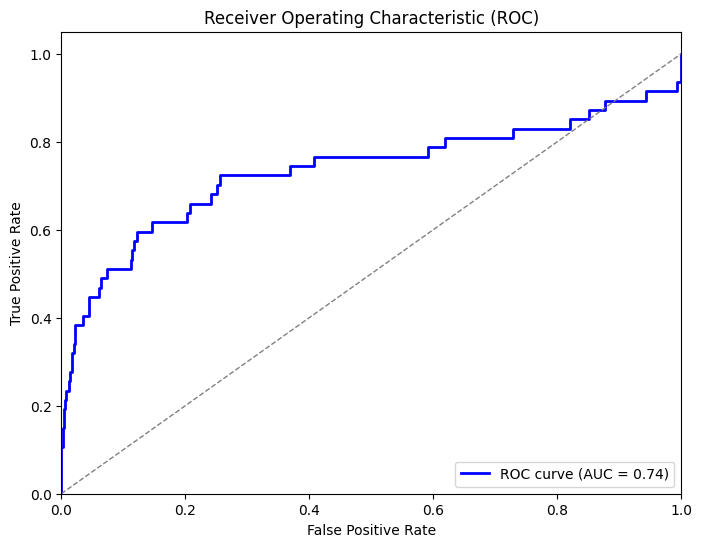

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [12]:
data=data[colonnes+['COM','NTLBIN']]

In [14]:
data=data.to_csv('emploifin.csv',index=False)